Matplotlib is building the font cache; this may take a moment.


CAMPUS DATA STRUCTURE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   district_name              25 non-null     object 
 1   campus_name                25 non-null     object 
 2   grades_served              25 non-null     object 
 3   overall_score              25 non-null     int64  
 4   student_achievement_score  25 non-null     int64  
 5   school_progress_score      25 non-null     int64  
 6   closing_the_gaps_score     25 non-null     int64  
 7   pct_ecodis                 25 non-null     float64
 8   pct_special_ed             25 non-null     float64
 9   pct_ell                    25 non-null     float64
 10  overall_enrollment         25 non-null     int64  
 11  enrollment_12th            25 non-null     int64  
 12  pct_ccmr_met               25 non-null     float64
dtypes: float64(4), int64(6), objec

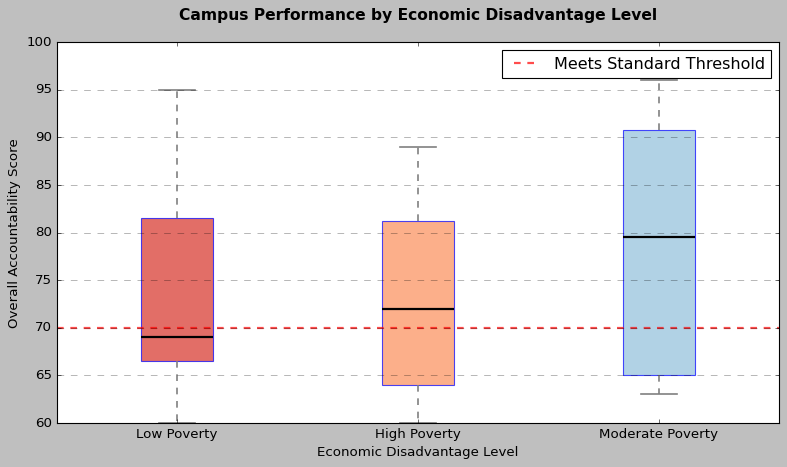

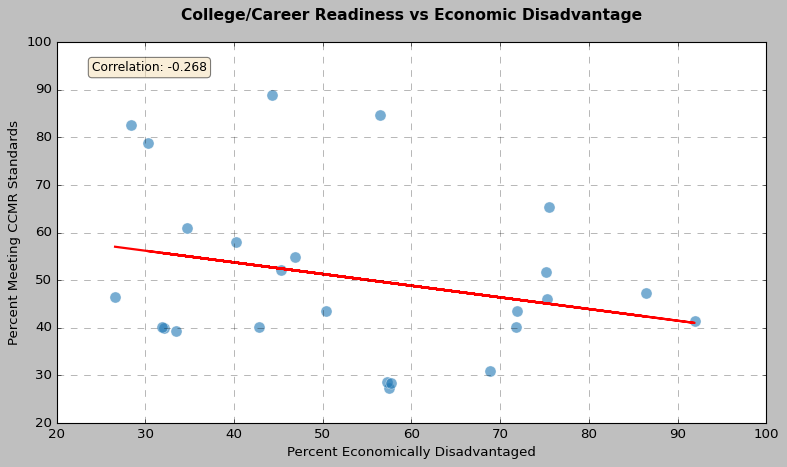

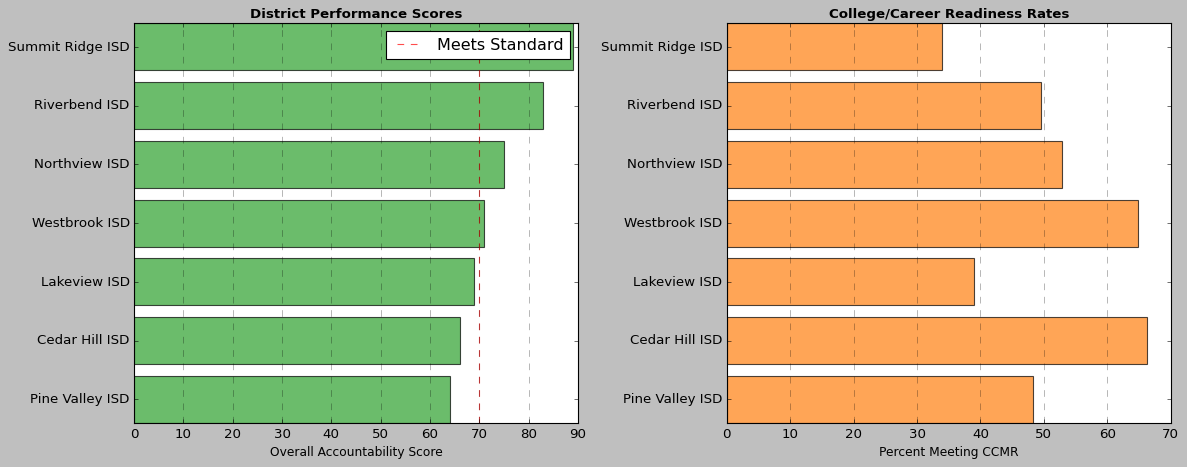

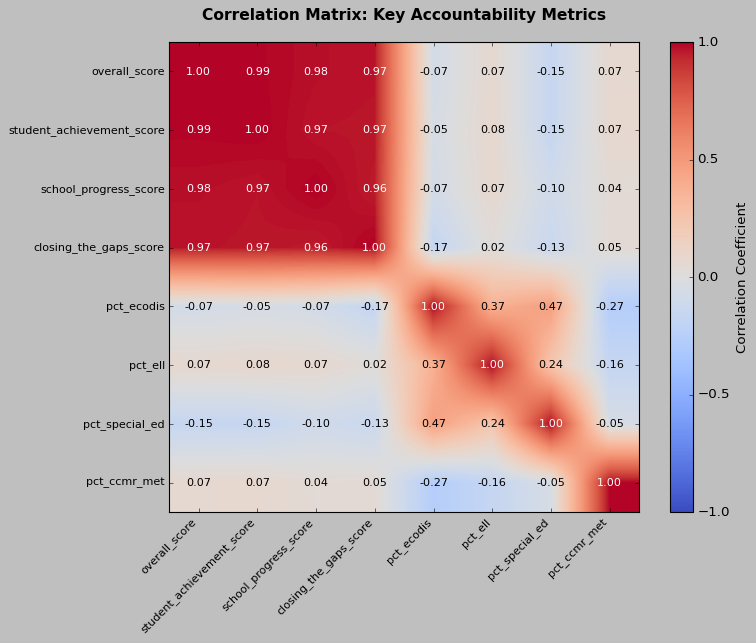

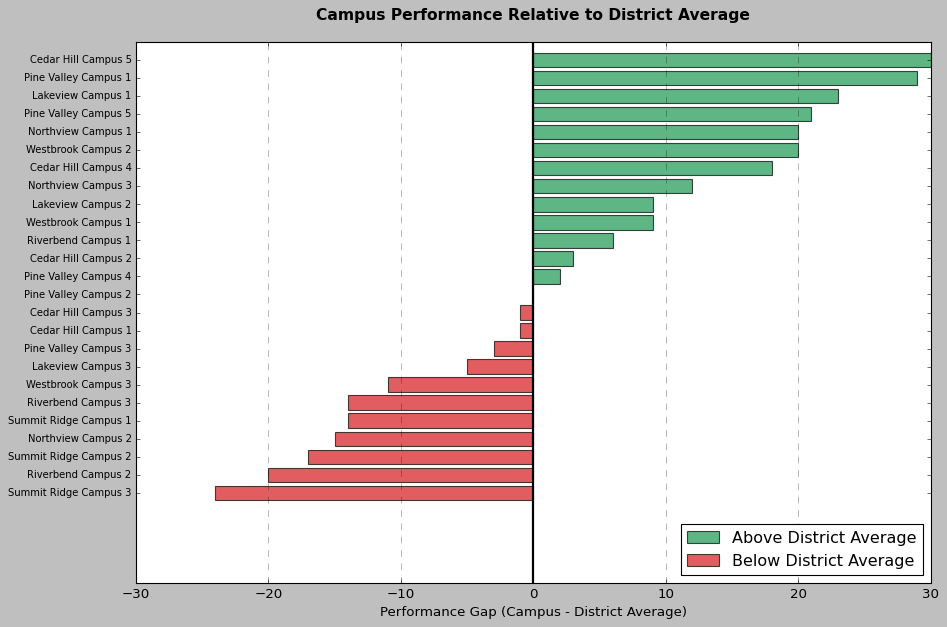

COMPREHENSIVE STATISTICAL ANALYSIS

1. DISTRICT-LEVEL OVERVIEW
   district_name  overall_enrollment  pct_ecodis  pct_ell  overall_score  grad_rate  pct_ccmr_met  performance_rank  ccmr_rank
Summit Ridge ISD                6764       55.80    16.10             89      92.00         34.00              1.00       7.00
   Riverbend ISD                5220       49.40    21.70             83      92.60         49.50              2.00       4.00
   Northview ISD                5452       47.00    21.20             75      92.40         52.80              3.00       3.00
   Westbrook ISD                6245       41.70    12.80             71      90.80         64.90              4.00       2.00
    Lakeview ISD                6851       51.40    22.90             69      93.20         38.90              5.00       6.00
  Cedar Hill ISD                7260       51.30    19.50             66      94.80         66.20              6.00       1.00
 Pine Valley ISD                7291       67.20

Summary statistics saved as CSV!


Saved: tea_accountability_analysis.xlsx (with multiple sheets)

FILES CREATED:
1. tea_campus_analysis_cleaned.csv - Campus-level data with derived metrics
2. tea_district_analysis_cleaned.csv - District-level summary
3. tea_accountability_analysis.xlsx - Excel workbook with all analysis

 Data exploration, cleaning, and export complete!


,poverty_level,num_campuses,avg_overall_score,avg_ccmr_rate,avg_equity_score,min_score,max_score
1,Low Poverty,7,74.30,55.40,71.40,60,95
2,Moderate Poverty,10,78.40,50.70,73.70,63,96
0,High Poverty,8,73.00,45.80,65.80,60,89


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100)      
pd.set_option('display.float_format', '{:.2f}'.format)  

df1 = pd.read_csv("state_accountability_campus.csv")
df2 = pd.read_csv("state_accountability_district.csv")

campus_df = pd.read_csv("state_accountability_campus.csv")
district_df = pd.read_csv("state_accountability_district.csv")

print("="*80)
print("CAMPUS DATA STRUCTURE")
print("="*80)

campus_df.info()

print("\n" + "="*80)
print("FIRST FEW ROWS - Campus Level")
print("="*80)

print(campus_df.head(3))

print("\n" + "="*80)
print("DISTRICT DATA STRUCTURE")
print("="*80)
district_df.info()

print("\n" + "="*80)
print("FIRST FEW ROWS - District Level")
print("="*80)
print(district_df.head(3))

print(f"\n Dataset Dimensions:")
print(f"Campus data: {campus_df.shape[0]} rows × {campus_df.shape[1]} columns")
print(f"District data: {district_df.shape[0]} rows × {district_df.shape[1]} columns")

"""
==========================================
STEP 2: DATA QUALITY CHECKS
==========================================

# PURPOSE: Identify missing values, duplicates, and data issues

# WHY THIS MATTERS: Bad data leads to bad decisions. We need to find and fix
issues before analysis.

# KEY FUNCTIONS EXPLAINED:
- .isnull() checks each cell for missing values (returns True/False)
- .sum() counts True values (missing data counts)
- .duplicated() finds duplicate rows
"""

print("="*80)
print(" DATA QUALITY ASSESSMENT - CAMPUS LEVEL")
print("="*80)
# Check for missing values in each column
# .isnull().sum() counts how many missing values per column

campus_missing = campus_df.isnull().sum()
print("\nMissing Values by Column:")
print(campus_missing[campus_missing > 0])

if campus_missing.sum() == 0:
    print(" No missing values found in campus data!")
# Check for duplicate rows
campus_duplicates = campus_df.duplicated().sum()
print(f"\nDuplicate Rows: {campus_duplicates}")
if campus_duplicates == 0:
    print("No duplicate rows found!")

print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT - DISTRICT LEVEL")
print("="*80)

district_missing = district_df.isnull().sum()
print("\nMissing Values by Column:")
print(district_missing[district_missing > 0])

if district_missing.sum() == 0:
    print("No missing values found in district data!")

district_duplicates = district_df.duplicated().sum()
print(f"\nDuplicate Rows: {district_duplicates}")
if district_duplicates == 0:
    print("No duplicate rows found!")

# Check data types - important for calculations
print("\n" + "="*80)
print("DATA TYPES")
print("="*80)
print("\nCampus Data Types:")
print(campus_df.dtypes)
print("\nDistrict Data Types:")
print(district_df.dtypes)   

"""
==========================================
STEP 3: DESCRIPTIVE STATISTICS
==========================================

PURPOSE: Understand the distribution and range of your numeric data

WHY: Statistics reveal patterns:
- Mean: typical/average value
- Std: how spread out the data is
- Min/Max: the range of values
- 25%/50%/75%: quartiles show distribution

.describe() automatically calculates these for all numeric columns
"""

print("="*80)
print("CAMPUS-LEVEL STATISTICS")
print("="*80)
# .describe() gives summary statistics for numeric columns
campus_stats = campus_df.describe()
# .T transposes (flips) the table to make it easier to read
print(campus_stats.T)

print("\n" + "="*80)
print("DISTRICT-LEVEL STATISTICS")
print("="*80)
district_stats = district_df.describe()
print(district_stats.T)

# Let's also look at text/categorical columns
print("\n" + "="*80)
print("CATEGORICAL DATA SUMMARY")
print("="*80)

# select_dtypes('object') gets text columns only
print("\nUnique Districts:")
print(f"Count: {campus_df['district_name'].nunique()}")
print(campus_df['district_name'].value_counts()) # Count campuses per district

print("\nGrade Configurations:")
print(campus_df['grades_served'].value_counts())

import pandas as pd

campus_summary = pd.DataFrame({
    'dataset': ['campus_data'],
    'total_rows': [len(campus_df)],
    'has_district_name': [campus_df['district_name'].count()],
    'has_campus_name': [campus_df['campus_name'].count()],
    'has_overall_score': [campus_df['overall_score'].count()],
    'has_pct_ecodis': [campus_df['pct_ecodis'].count()],
    'has_pct_ccmr_met': [campus_df['pct_ccmr_met'].count()],
    'has_enrollment_12th': [campus_df['enrollment_12th'].count()]
})

district_summary = pd.DataFrame({
    'dataset': ['district_data'],
    'total_rows': [len(district_df)],
    'has_district_name': [district_df['district_name'].count()],
    'has_campus_name': [None],
    'has_overall_score': [district_df['overall_score'].count()],
    'has_pct_ecodis': [district_df['pct_ecodis'].count()],
    'has_pct_ccmr_met': [district_df['pct_ccmr_met'].count()],
    'has_enrollment_12th': [district_df['enrollment_12th'].count()]
})

summary = pd.concat([campus_summary, district_summary], ignore_index=True)
print(summary)

import pandas as pd
summary = pd.DataFrame({
    'metric': [
        'Economically Disadvantaged %',
        'English Language Learners %',
        'Special Education %',
        'CCMR Met %',
        'Overall Score'
    ],
    'min_value': [
        round(campus_df['pct_ecodis'].min(), 1),
        round(campus_df['pct_ell'].min(), 1),
        round(campus_df['pct_special_ed'].min(), 1),
        round(campus_df['pct_ccmr_met'].min(), 1),
        round(campus_df['overall_score'].min(), 1)
    ],
    'avg_value': [
        round(campus_df['pct_ecodis'].mean(), 1),
        round(campus_df['pct_ell'].mean(), 1),
        round(campus_df['pct_special_ed'].mean(), 1),
        round(campus_df['pct_ccmr_met'].mean(), 1),
        round(campus_df['overall_score'].mean(), 1)
    ],
    'max_value': [
        round(campus_df['pct_ecodis'].max(), 1),
        round(campus_df['pct_ell'].max(), 1),
        round(campus_df['pct_special_ed'].max(), 1),
        round(campus_df['pct_ccmr_met'].max(), 1),
        round(campus_df['overall_score'].max(), 1)
    ],
    'range_gap': [
        round(campus_df['pct_ecodis'].max() - campus_df['pct_ecodis'].min(), 1),
        round(campus_df['pct_ell'].max() - campus_df['pct_ell'].min(), 1),
        round(campus_df['pct_special_ed'].max() - campus_df['pct_special_ed'].min(), 1),
        round(campus_df['pct_ccmr_met'].max() - campus_df['pct_ccmr_met'].min(), 1),
        round(campus_df['overall_score'].max() - campus_df['overall_score'].min(), 1)
    ]
})
print(summary)

campus_clean = campus_df.copy()
district_clean = district_df.copy()

print("="*80)
print("CREATING EQUITY INDICATORS")
print("="*80)

campus_clean['ecodis_category'] = pd.cut(
    campus_clean['pct_ecodis'],
    bins=[0, 40, 60, 100],
    labels=['Low Poverty', 'Moderate Poverty', 'High Poverty']
)

print("\nCampuses by Economic Disadvantage Level:")
print(campus_clean['ecodis_category'].value_counts().sort_index())

campus_clean['ell_category'] = pd.cut(
    campus_clean['pct_ell'],
    bins=[0, 15, 25, 100],
    labels=['Low ELL', 'Moderate ELL', 'High ELL']
)

print("\nCampuses by English Language Learner Level:")
print(campus_clean['ell_category'].value_counts().sort_index())

campus_clean['performance_level'] = pd.cut(
    campus_clean['overall_score'],
    bins=[0, 70, 85, 100],
    labels=['Needs Improvement', 'Meets Standard', 'Exemplary']
)

print("\nCampuses by Performance Level:")
print(campus_clean['performance_level'].value_counts().sort_index())

campus_clean['ccmr_category'] = pd.cut(
    campus_clean['pct_ccmr_met'],
    bins=[0, 40, 60, 100],
    labels=['Low Readiness', 'Moderate Readiness', 'High Readiness']
)

print("\nCampuses by CCMR Readiness Level:")
print(campus_clean['ccmr_category'].value_counts().sort_index())

campus_clean['size_category'] = pd.cut(
    campus_clean['overall_enrollment'],
    bins=[0, 1000, 2000, 10000],
    labels=['Small', 'Medium', 'Large']
)

print("\nCampuses by Size:")
print(campus_clean['size_category'].value_counts().sort_index())

campus_enriched = campus_clean.merge(
    district_clean[['district_name', 'overall_score', 'pct_ccmr_met']],
    on='district_name',
    suffixes=('_campus', '_district')  # Distinguish duplicate column names
)

campus_enriched['performance_gap'] = (
    campus_enriched['overall_score_campus'] - 
    campus_enriched['overall_score_district']
)
campus_enriched['ccmr_gap'] = (
    campus_enriched['pct_ccmr_met_campus'] - 
    campus_enriched['pct_ccmr_met_district']
)
print("\n" + "="*80)
print("PERFORMANCE GAPS (Campus vs District Average)")
print("="*80)
print(f"Average Performance Gap: {campus_enriched['performance_gap'].mean():.1f} points")
print(f"Average CCMR Gap: {campus_enriched['ccmr_gap'].mean():.1f} percentage points")

print("\n Top 3 Campuses Outperforming Their District:")
top_performers = campus_enriched.nlargest(3, 'performance_gap')[
    ['campus_name', 'district_name', 'overall_score_campus', 
     'overall_score_district', 'performance_gap']
]
print(top_performers.to_string(index=False))

print("\n Top 3 Campuses Underperforming Their District:")
bottom_performers = campus_enriched.nsmallest(3, 'performance_gap')[
    ['campus_name', 'district_name', 'overall_score_campus', 
     'overall_score_district', 'performance_gap']
]
print(bottom_performers.to_string(index=False))

print("\n Feature engineering complete! New columns created:")
print(f"   - ecodis_category")
print(f"   - ell_category")
print(f"   - performance_level")
print(f"   - ccmr_category")
print(f"   - size_category")
print(f"   - performance_gap")
print(f"   - ccmr_gap")

print("="*80)
print("EQUITY ANALYSIS: Performance by Student Demographics")
print("="*80)

print("\n Performance by Economic Disadvantage Level:")
equity_by_ecodis = campus_clean.groupby('ecodis_category').agg({
    'overall_score': ['mean', 'min', 'max', 'count'],
    'pct_ccmr_met': ['mean'],
    'closing_the_gaps_score': ['mean']
}).round(1)
print(equity_by_ecodis)

print("\n Performance by ELL Population:")
equity_by_ell = campus_clean.groupby('ell_category').agg({
    'overall_score': ['mean', 'count'],
    'pct_ccmr_met': ['mean'],
    'closing_the_gaps_score': ['mean']
}).round(1)
print(equity_by_ell)

print("\n" + "="*80)
print("CORRELATION ANALYSIS: Relationships Between Variables")
print("="*80)

numeric_cols = ['overall_score', 'student_achievement_score', 'school_progress_score',
                'closing_the_gaps_score', 'pct_ecodis', 'pct_special_ed', 'pct_ell',
                'pct_ccmr_met', 'overall_enrollment']

correlations = campus_clean[numeric_cols].corr()

print("\nCorrelations with Overall Score:")
score_corr = correlations['overall_score'].sort_values(ascending=False)
print(score_corr)

print("\nCorrelations with CCMR (Postsecondary Readiness):")
ccmr_corr = correlations['pct_ccmr_met'].sort_values(ascending=False)
print(ccmr_corr)

print("\n" + "="*80)
print(" KEY EQUITY INSIGHTS")
print("="*80)

avg_low_poverty = campus_clean[campus_clean['ecodis_category'] == 'Low Poverty']['overall_score'].mean()
avg_high_poverty = campus_clean[campus_clean['ecodis_category'] == 'High Poverty']['overall_score'].mean()
achievement_gap = avg_low_poverty - avg_high_poverty

print(f"\n1. ACHIEVEMENT GAP BY POVERTY:")
print(f"   Low Poverty Campuses Average: {avg_low_poverty:.1f}")
print(f"   High Poverty Campuses Average: {avg_high_poverty:.1f}")
print(f"   Achievement Gap: {achievement_gap:.1f} points")

ccmr_low_poverty = campus_clean[campus_clean['ecodis_category'] == 'Low Poverty']['pct_ccmr_met'].mean()
ccmr_high_poverty = campus_clean[campus_clean['ecodis_category'] == 'High Poverty']['pct_ccmr_met'].mean()
ccmr_gap = ccmr_low_poverty - ccmr_high_poverty

print(f"\n2. POSTSECONDARY READINESS GAP:")
print(f"   Low Poverty Campuses CCMR: {ccmr_low_poverty:.1f}%")
print(f"   High Poverty Campuses CCMR: {ccmr_high_poverty:.1f}%")
print(f"   Readiness Gap: {ccmr_gap:.1f} percentage points")

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12, 6)

print("Creating all visualizations...")

fig, ax = plt.subplots(figsize=(10, 6))

categories = campus_clean['ecodis_category'].unique()
data_to_plot = [campus_clean[campus_clean['ecodis_category']==cat]['overall_score'] 
                for cat in categories]

colors = ['#d73027','#fc8d59','#91bfdb','#1a9850']

box = ax.boxplot(data_to_plot, labels=categories, patch_artist=True,
                 medianprops=dict(color='black', linewidth=2),
                 whiskerprops=dict(color='gray', linewidth=1.5),
                 capprops=dict(color='gray', linewidth=1.5))

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Campus Performance by Economic Disadvantage Level', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Economic Disadvantage Level', fontsize=12)
ax.set_ylabel('Overall Accountability Score', fontsize=12)
ax.axhline(y=70, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Meets Standard Threshold')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(campus_clean['pct_ecodis'], campus_clean['pct_ccmr_met'], 
           alpha=0.6, s=100, c='#1f77b4', edgecolors='w', linewidths=0.5)

m, b = np.polyfit(campus_clean['pct_ecodis'], campus_clean['pct_ccmr_met'], 1)
ax.plot(campus_clean['pct_ecodis'], m*campus_clean['pct_ecodis'] + b, color='red', linewidth=2)

ax.set_title('College/Career Readiness vs Economic Disadvantage', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Percent Economically Disadvantaged', fontsize=12)
ax.set_ylabel('Percent Meeting CCMR Standards', fontsize=12)

correlation = np.corrcoef(campus_clean['pct_ecodis'], campus_clean['pct_ccmr_met'])[0, 1]
ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=ax.transAxes,
        fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
district_summary = district_clean.sort_values('overall_score', ascending=True)

ax1.barh(district_summary['district_name'], district_summary['overall_score'], color='#2ca02c', alpha=0.7)
ax1.set_xlabel('Overall Accountability Score', fontsize=11)
ax1.set_title('District Performance Scores', fontsize=12, fontweight='bold')
ax1.axvline(x=70, color='red', linestyle='--', alpha=0.7, label='Meets Standard')
ax1.legend()
ax1.grid(axis='x', linestyle='--', alpha=0.5)

ax2.barh(district_summary['district_name'], district_summary['pct_ccmr_met'], color='#ff7f0e', alpha=0.7)
ax2.set_xlabel('Percent Meeting CCMR', fontsize=11)
ax2.set_title('College/Career Readiness Rates', fontsize=12, fontweight='bold')
ax2.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

key_vars = ['overall_score', 'student_achievement_score', 'school_progress_score',
            'closing_the_gaps_score', 'pct_ecodis', 'pct_ell', 
            'pct_special_ed', 'pct_ccmr_met']

corr_matrix = campus_clean[key_vars].corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Correlation Coefficient', fontsize=12)

for i in range(len(key_vars)):
    for j in range(len(key_vars)):
        text_color = 'white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black'
        ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=10)

ax.set_xticks(range(len(key_vars)))
ax.set_yticks(range(len(key_vars)))
ax.set_xticklabels(key_vars, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(key_vars, rotation=0, fontsize=10)

ax.set_title('Correlation Matrix: Key Accountability Metrics', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
gap_data = campus_enriched.sort_values('performance_gap')
colors = ['#d7191c' if x < 0 else '#1a9850' for x in gap_data['performance_gap']]

ax.barh(range(len(gap_data)), gap_data['performance_gap'], color=colors, alpha=0.7)
ax.set_yticks(range(len(gap_data)))
ax.set_yticklabels(gap_data['campus_name'], fontsize=9)
ax.set_xlabel('Performance Gap (Campus - District Average)', fontsize=12)
ax.set_title('Campus Performance Relative to District Average', fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Patch(facecolor='#1a9850', alpha=0.7, label='Above District Average'),
    Patch(facecolor='#d7191c', alpha=0.7, label='Below District Average')
]
ax.legend(handles=legend_elements, loc='lower right')
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

from scipy import stats
import pandas as pd

print("="*80)
print("COMPREHENSIVE STATISTICAL ANALYSIS")
print("="*80)

print("\n" + "="*60)
print("1. DISTRICT-LEVEL OVERVIEW")
print("="*60)

district_stats = district_clean[[
    'district_name', 'overall_enrollment', 'pct_ecodis', 
    'pct_ell', 'overall_score', 'grad_rate', 'pct_ccmr_met'
]].copy()

district_stats['performance_rank'] = district_stats['overall_score'].rank(ascending=False)
district_stats['ccmr_rank'] = district_stats['pct_ccmr_met'].rank(ascending=False)

district_stats_sorted = district_stats.sort_values('overall_score', ascending=False)
print(district_stats_sorted.to_string(index=False))

print("\n" + "="*60)
print("2. EQUITY GAP ANALYSIS")
print("="*60)

low_poverty = campus_clean[campus_clean['ecodis_category'] == 'Low Poverty']
high_poverty = campus_clean[campus_clean['ecodis_category'] == 'High Poverty']

print(f"\nNumber of Campuses:")
print(f"  Low Poverty: {len(low_poverty)}")
print(f"  High Poverty: {len(high_poverty)}")

print(f"\nMean Overall Score:")
print(f"  Low Poverty: {low_poverty['overall_score'].mean():.1f}")
print(f"  High Poverty: {high_poverty['overall_score'].mean():.1f}")
print(f"  Gap: {low_poverty['overall_score'].mean() - high_poverty['overall_score'].mean():.1f} points")

print(f"\nMean CCMR Rate:")
print(f"  Low Poverty: {low_poverty['pct_ccmr_met'].mean():.1f}%")
print(f"  High Poverty: {high_poverty['pct_ccmr_met'].mean():.1f}%")
print(f"  Gap: {low_poverty['pct_ccmr_met'].mean() - high_poverty['pct_ccmr_met'].mean():.1f} percentage points")

t_stat, p_value = stats.ttest_ind(
    low_poverty['overall_score'].dropna(),
    high_poverty['overall_score'].dropna()
)
print(f"\nStatistical Significance (t-test):")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value: {p_value:.4f}")
if p_value < 0.05:
    print(f"  ✓ Difference is statistically significant (p < 0.05)")
else:
    print(f"  ✗ Difference is not statistically significant (p >= 0.05)")

print("\n" + "="*60)
print("3. PERFORMANCE DISTRIBUTION ANALYSIS")
print("="*60)

perf_counts = campus_clean['performance_level'].value_counts().sort_index()
print("\nCampuses by Performance Level:")
for level, count in perf_counts.items():
    pct = (count/len(campus_clean))*100
    print(f"  {level}: {count} campuses ({pct:.1f}%)")

print("\n" + "="*60)
print("4. ACCESS & ENROLLMENT PATTERNS")
print("="*60)

size_performance = campus_clean.groupby('size_category').agg({
    'overall_score': ['mean', 'count'],
    'pct_ccmr_met': 'mean',
    'overall_enrollment': 'mean'
}).round(1)

print("\nPerformance by Campus Size:")
print(size_performance)

print("\n" + "="*60)
print("5. KEY CORRELATIONS")
print("="*60)

correlations_perf = campus_clean[key_vars].corr()['overall_score'].sort_values()
print("\nVariables Correlated with Overall Performance:")
for var, corr in correlations_perf.items():
    if var != 'overall_score':
        strength = 'Strong' if abs(corr) > 0.7 else 'Moderate' if abs(corr) > 0.4 else 'Weak'
        direction = 'positive' if corr > 0 else 'negative'
        print(f"  {var}: {corr:.3f} ({strength} {direction})")

print("="*80)
print("EXPORTING CLEANED & PREPARED DATA")
print("="*80)

campus_export = campus_enriched.copy()

campus_export_clean = campus_export[[
    'district_name', 'campus_name', 'grades_served',
    'overall_enrollment', 'enrollment_12th',
    'pct_ecodis', 'ecodis_category',
    'pct_ell', 'ell_category',
    'pct_special_ed',
    'overall_score_campus', 'overall_score_district', 'performance_gap',
    'student_achievement_score', 'school_progress_score', 'closing_the_gaps_score',
    'pct_ccmr_met_campus', 'pct_ccmr_met_district', 'ccmr_gap', 'ccmr_category',
    'performance_level', 'size_category'
]]

campus_export_clean.columns = [
    'District', 'Campus', 'Grades',
    'Enrollment', '12th_Grade_Enrollment',
    'Pct_Econ_Disadvantaged', 'Poverty_Level',
    'Pct_ELL', 'ELL_Level',
    'Pct_Special_Ed',
    'Campus_Overall_Score', 'District_Overall_Score', 'Performance_Gap_vs_District',
    'Achievement_Score', 'Progress_Score', 'Closing_Gaps_Score',
    'Campus_CCMR_Pct', 'District_CCMR_Pct', 'CCMR_Gap_vs_District', 'CCMR_Readiness_Level',
    'Performance_Category', 'Campus_Size'
]

campus_export_clean.to_csv('tea_campus_analysis_cleaned.csv', index=False)
print("Saved: tea_campus_analysis_cleaned.csv")

district_export = district_clean.copy()
district_export.to_csv('tea_district_analysis_cleaned.csv', index=False)
print("Saved: tea_district_analysis_cleaned.csv")

import pandas as pd
from pyodide.http import open_url

campus_export_clean.to_csv('campus_analysis.csv', index=False)
district_export.to_csv('district_summary.csv', index=False)

print("CSV files saved successfully!")

from IPython.display import display, HTML

display(HTML("""
<h3>Download CSV files:</h3>
<ul>
<li><a href="campus_analysis.csv" download>Campus Analysis CSV</a></li>
<li><a href="district_summary.csv" download>District Summary CSV</a></li>
</ul>
"""))

summary_stats = pd.DataFrame({
    'Metric': [
        'Total Districts', 'Total Campuses', 'Total Enrollment',
        'Avg District Score', 'Avg Campus Score', 'Avg CCMR Rate',
        'Avg Poverty Rate', 'Avg ELL Rate'
    ],
    'Value': [
        len(district_export),
        len(campus_export_clean),
        district_export['overall_enrollment'].sum(),
        district_export['overall_score'].mean(),
        campus_export_clean['Campus_Overall_Score'].mean(),
        campus_export_clean['Campus_CCMR_Pct'].mean(),
        campus_export_clean['Pct_Econ_Disadvantaged'].mean(),
        campus_export_clean['Pct_ELL'].mean()
    ]
})

summary_stats.to_csv('summary_stats.csv', index=False)

print("Summary statistics saved as CSV!")

from IPython.display import display, HTML
display(HTML('<a href="summary_stats.csv" download>Download Summary Statistics CSV</a>'))

print("Saved: tea_accountability_analysis.xlsx (with multiple sheets)")

print("\n" + "="*80)
print("FILES CREATED:")
print("="*80)
print("1. tea_campus_analysis_cleaned.csv - Campus-level data with derived metrics")
print("2. tea_district_analysis_cleaned.csv - District-level summary")
print("3. tea_accountability_analysis.xlsx - Excel workbook with all analysis")
print("\n Data exploration, cleaning, and export complete!")

def poverty_level(pct):
    if pct < 40:
        return 'Low Poverty'
    elif pct < 60:
        return 'Moderate Poverty'
    else:
        return 'High Poverty'

campus_df['poverty_level'] = campus_df['pct_ecodis'].apply(poverty_level)

summary = campus_df.groupby('poverty_level').agg(
    num_campuses=('campus_name', 'count'),
    avg_overall_score=('overall_score', lambda x: round(x.mean(), 1)),
    avg_ccmr_rate=('pct_ccmr_met', lambda x: round(x.mean(), 1)),
    avg_equity_score=('closing_the_gaps_score', lambda x: round(x.mean(), 1)),
    min_score=('overall_score', lambda x: round(x.min(), 1)),
    max_score=('overall_score', lambda x: round(x.max(), 1))
).reset_index()

summary['poverty_order'] = summary['poverty_level'].map({
    'Low Poverty': 1,
    'Moderate Poverty': 2,
    'High Poverty': 3
})
summary = summary.sort_values('poverty_order').drop(columns='poverty_order')

summary